In [1]:
import numpy as np
from os import listdir
from os import path
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle

In [2]:
from learn import *
import utils

Task number: 298
Number of train examples 2
0
     input shapes [(6, 6), (6, 6)]
     output shapes [(6, 6), (6, 6)]


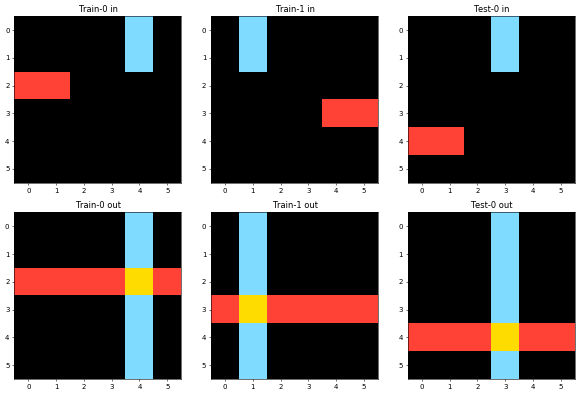

In [3]:
tr, te, ev = utils.get_data()
t = Task(298, tr[298])
t.summary()
t.plot()

In [4]:
IM = t.train[0].input
OM = t.train[0].output
IM1 = t.train[1].input
OM1 = t.train[1].output

In [5]:
OM.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 2, 2, 4, 2],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0]], dtype=object)

In [6]:
from feature_calc import FeatureCalculator
from itertools import product
from datetime import datetime

def get_features_for_matrix(M):
    features = []
    xsh, ysh = np.shape(M)
    b1 = datetime.now()
    for y, x in product(range(ysh), range(xsh)):
        c = M[y][x]
        fc = FeatureCalculator(c.y, c.x, c.v, M.m)
        features.append(fc.features().T)
    #     print(y,x)
    #     features[y,x] = fc.features()
    b2 = datetime.now()
    diff = (b1 - b2)
    print('took',diff.microseconds / 1000, 'miliseconds')
    f = np.array(features)
    f = np.reshape(f, (ysh, xsh, *f.shape[1:]))
    return f
    
IM.f = get_features_for_matrix(IM)
OM.f = get_features_for_matrix(OM)
IM1.f = get_features_for_matrix(IM1)
OM1.f = get_features_for_matrix(OM1)
IM.f.shape

took 997.836 miliseconds
took 997.783 miliseconds
took 997.493 miliseconds
took 997.735 miliseconds


(6, 6, 6, 6, 6)

In [7]:
OM1.m

array([[0, 8, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0],
       [2, 4, 2, 2, 2, 2],
       [0, 8, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0]], dtype=object)

In [8]:
OM.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 2, 2, 4, 2],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0]], dtype=object)

In [9]:
OM1.f[1,1,:].T

array([[[True, True, True, True, True, True],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]],

       [[True, False, False, False, False, False],
        [True, False, False, False, False, False],
        [True, False, False, False, False, False],
        [True, False, False, False, False, False],
        [True, False, False, False, False, False],
        [True, False, False, False, False, False]],

       [[1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [2, 2, 2, 2, 2, 2]],

       [[1, 0, 1, 2, 3, 2],
        [1, 0, 1, 2, 3, 2],
        [1, 0, 1, 2, 3, 2],
        [1, 0, 1, 2, 3, 2],
        [1, 0, 1, 2, 3, 2],
        [1, 0, 1, 2, 3, 2]],

       [[False, True, False, False, False, F

In [10]:
def sort_cells_features(f):
    # Receives feature map at point example: OM.f[2,0,:]
    flat = f.reshape(-1, f.shape[-1])
    key = lambda x: ''.join(list(map(str,[int(x[0]), int(x[1]), x[2], x[3]])))
    s = sorted(flat, key=key)
    return s
# flat[0]
# key(flat[0])
b1 = sort_cells_features(OM1.f[1,1,:])
ysh, xsh = np.shape(IM)
best_match = {}
for y, x in product(range(ysh), range(xsh)):
    b2 = sort_cells_features(OM.f[y,x,:])
    v = []
    for a,b in zip(b1, b2):
#         print(a[2:], b[2:])
        v.append(np.array_equal(a,b))
#     best_match[(y,x)] = (np.sum(v),v)
    best_match[(y,x)] = np.sum(v)

# sorted(best_match, key=lambda x: x.value)
best_match
    

{(0, 0): 1,
 (0, 1): 2,
 (0, 2): 3,
 (0, 3): 1,
 (0, 4): 2,
 (0, 5): 1,
 (1, 0): 2,
 (1, 1): 4,
 (1, 2): 2,
 (1, 3): 2,
 (1, 4): 4,
 (1, 5): 2,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 1,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 1,
 (3, 0): 1,
 (3, 1): 2,
 (3, 2): 1,
 (3, 3): 1,
 (3, 4): 2,
 (3, 5): 1,
 (4, 0): 1,
 (4, 1): 2,
 (4, 2): 1,
 (4, 3): 1,
 (4, 4): 2,
 (4, 5): 1,
 (5, 0): 1,
 (5, 1): 1,
 (5, 2): 1,
 (5, 3): 1,
 (5, 4): 2,
 (5, 5): 1}

In [12]:
c1, c2 = active[0, :], active[2,:]
active[0].T

NameError: name 'active' is not defined

In [13]:
# c1.y, c1.x, c1.v, c1.shape
# c1 is (0, 4) c2 is(0 , 2)1
# t == True

# np.where(c1[0,:])

In [14]:
# print(np.dstack(np.nonzero(c1 == c2)))
np.reshape(c1, (-1, c1.shape[-1])).T

NameError: name 'c1' is not defined

In [15]:
from collections import Counter

In [16]:
counts = []
for i in range(feat.shape[0]):
    counts.append(Counter(feat[i]))

NameError: name 'feat' is not defined

In [17]:
counts

[]

In [18]:
f = active
flattened = f.reshape((-1, f.shape[-1]))
flattened.shape

NameError: name 'active' is not defined

In [19]:
from collections import Sequence

def recursive_map (seq, func):
    for item in seq:
        if isinstance(item, Sequence):
            yield type(item)(recursive_map(item, func))
        else:
            yield func(item)

/home/daniel/.local/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [20]:
temp = map(list, flattened)
s = recursive_map(list(temp), str)
sr = list(map(str, range(flattened.shape[1])))
# list(map(lambda a: '--'.join(*tuple(zip(a, sr))), s))
# list(s)
x = map(lambda a: tuple(zip(a, sr)), s)
tupled = list(x)
tupled

NameError: name 'flattened' is not defined

In [21]:
# f1 = lambda elem: str(elem) + 
# f = lambda l: str(l) 
# temp = map()
# flattened = list()
# np.shape(flattened)

In [22]:
from efficient_apriori import apriori

In [23]:
itemsets, rules = apriori(tupled, min_support=0.01,  min_confidence=1, verbosity=2)

NameError: name 'tupled' is not defined

In [24]:
len(rules)

NameError: name 'rules' is not defined

In [25]:
len(itemsets)
itemsets[8]

NameError: name 'itemsets' is not defined

In [26]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)

NameError: name 'rules' is not defined

In [27]:
print(rules[1])

NameError: name 'rules' is not defined

In [28]:
diffs = [ex.input.m - ex.output.m for ex in t.train]
np.shape(diffs)
et1 = diffs[0]
inpt1, outt1 = t.train[0].input, t.train[0].output

In [29]:
args = np.argwhere(et1 != 0)
args

array([[2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 4],
       [4, 4],
       [5, 4]])

In [30]:
inpt1.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=object)

In [31]:
# F = [
#     (FeatureCalculator(*p, inpt1[p], inpt1), FeatureCalculator(*p, outt1[p], outt1))
#     for p in args
# ]
# F[5][0].features()

m1 = inpt1.m
m2 = outt1.m

In [32]:
from sklearn.decomposition import MiniBatchDictionaryLearning

d = MiniBatchDictionaryLearning().fit(m1, y=m2)

In [33]:
d

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=None, n_iter=1000,
              n_jobs=None, positive_code=False, positive_dict=False,
              random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='omp', transform_alpha=None,
              transform_n_nonzero_coefs=None, verbose=False)

In [34]:
d.transform(t.test[0].input)

/home/daniel/.local/lib/python3.7/site-packages/sklearn/decomposition/dict_learning.py:173: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


array([[0.        , 0.        , 3.5041048 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.5041048 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 2.82842712, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])